Decision Tree Classifier

Read the dataset

In [1]:
path = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/drug200.csv"
import pandas as pd

df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [2]:
df["Drug"].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [4]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.duplicated().sum()

0

There are no missing values nor any duplicated rows in this dataset
Separate X and Y features
Y: Drug to be prescribed

In [7]:
df.columns


Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [8]:
X = df.drop(columns="Drug")
Y = df[["Drug"]]

In [9]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [10]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


Data Preprocessing and Data Cleaning

In [11]:
# Data Preprocessing and Data Cleaning
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [12]:
cat = list(X.columns[X.dtypes == "object"])
con = list(X.columns[X.dtypes != "object"])

In [13]:
print(cat)

['Sex', 'BP', 'Cholesterol']


In [14]:
print(con)

['Age', 'Na_to_K']


In [15]:
con_pipe = make_pipeline(SimpleImputer(strategy="mean"), StandardScaler())

In [16]:
cat_pipe = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore", sparse_output=False),
)


In [17]:
pre = ColumnTransformer([("cat", cat_pipe, cat), ("con", con_pipe, con)]).set_output(
    transform="pandas"
)

In [18]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K'])])

In [19]:
X_pre = pre.fit_transform(X)
X_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,-1.291591,1.286522
1,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.415145
2,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.162699,-0.828558
3,1.0,0.0,0.0,0.0,1.0,1.0,0.0,-0.988614,-1.149963
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.011034,0.271794


Split the dataset into training and testing

In [20]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    X_pre, Y, train_size=0.8, random_state=21
)

In [21]:
xtrain.shape

(160, 9)

In [22]:
xtest.shape

(40, 9)

In [23]:
ytrain.shape

(160, 1)

In [24]:
ytest.shape

(40, 1)

Build the Decision Tree model

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtc = DecisionTreeClassifier(
    max_depth=5, min_samples_split=3, min_samples_leaf=4, criterion="gini"
)

In [27]:
dtc.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=4, min_samples_split=3)

In [28]:
dtc.score(xtrain, ytrain)

1.0

In [29]:
dtc.score(xtest, ytest)

0.95

In [31]:
params = {
    "max_depth": [2, 3, 4, 5, 7, 9, 10],
    "min_samples_split": [2, 3, 4, 5, 6],
    "min_samples_leaf": [1, 2, 3, 5, 6],
    "criterion": ["gini", "entropy"],
}

In [32]:
from sklearn.model_selection import GridSearchCV

base_model = DecisionTreeClassifier()
gscv = GridSearchCV(estimator=base_model, param_grid=params, scoring="f1_macro", cv=3)
gscv.fit(xtrain, ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6]},
             scoring='f1_macro')

In [33]:
gscv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [34]:
gscv.best_score_

0.9962827097089754

In [35]:
best_gscv = gscv.best_estimator_
best_gscv.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=4)

In [36]:
best_gscv.score(xtrain, ytrain)

1.0

In [37]:
best_gscv.score(xtest, ytest)

0.95

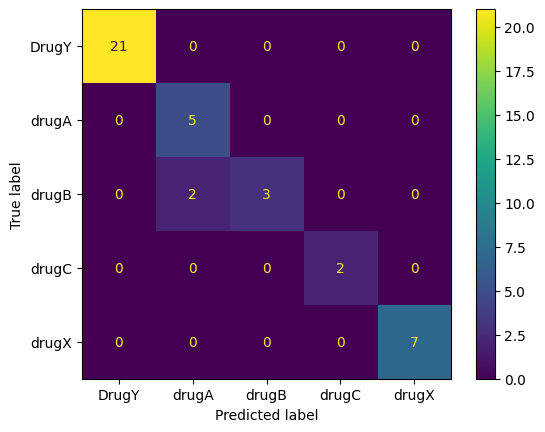

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_gscv, xtest, ytest)


In [39]:
ypred = best_gscv.predict(xtest)
ypred[:5]

array(['drugA', 'DrugY', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [40]:
ytest.head()

,Drug
144,drugA
9,DrugY
17,drugA
20,DrugY
45,drugX


In [41]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        21
       drugA       0.71      1.00      0.83         5
       drugB       1.00      0.60      0.75         5
       drugC       1.00      1.00      1.00         2
       drugX       1.00      1.00      1.00         7

    accuracy                           0.95        40
   macro avg       0.94      0.92      0.92        40
weighted avg       0.96      0.95      0.95        40



Above model is giving good score for f1-macro avg . Can be considered for out of sample predictions
Plot the decision tree


In [42]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


In [43]:
fea_names = xtrain.columns
fea_names


Index(['cat__Sex_F', 'cat__Sex_M', 'cat__BP_HIGH', 'cat__BP_LOW',
       'cat__BP_NORMAL', 'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL',
       'con__Age', 'con__Na_to_K'],
      dtype='object')

In [44]:
best_gscv.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

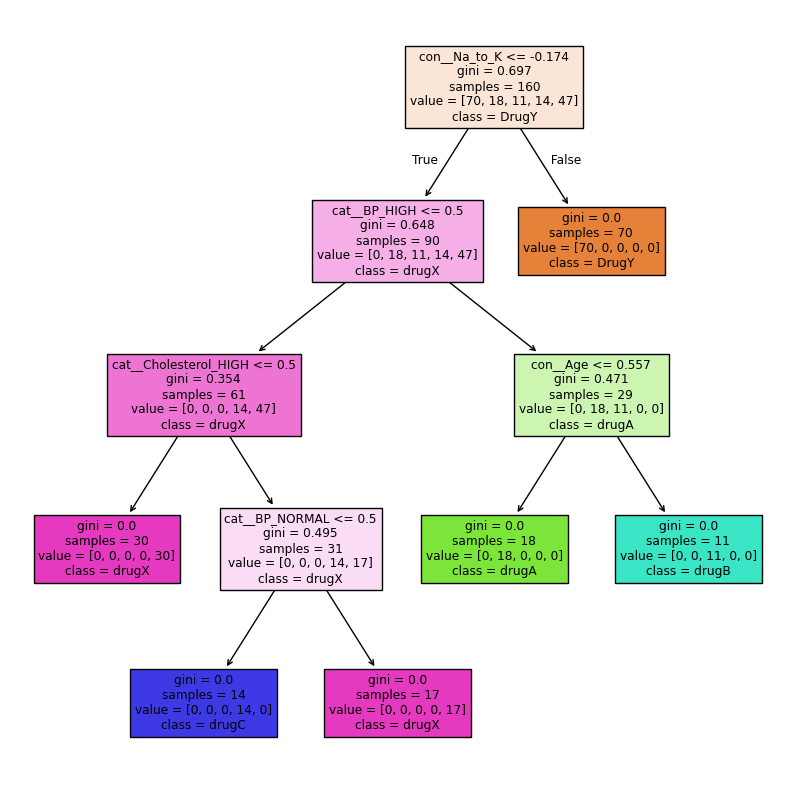

In [45]:
plt.figure(figsize=(10, 10))
plot_tree(
    best_gscv, feature_names=fea_names, class_names=best_gscv.classes_, filled=True
)
plt.show()

In [46]:
best_gscv.feature_importances_

array([0.        , 0.        , 0.20709818, 0.        , 0.13763441,
       0.05574393, 0.        , 0.1223993 , 0.47712418])

In [47]:
imp = pd.Series(best_gscv.feature_importances_, index=xtrain.columns)
imp.sort_values(ascending=False)

con__Na_to_K               0.477124
cat__BP_HIGH               0.207098
cat__BP_NORMAL             0.137634
con__Age                   0.122399
cat__Cholesterol_HIGH      0.055744
cat__Sex_F                 0.000000
cat__Sex_M                 0.000000
cat__BP_LOW                0.000000
cat__Cholesterol_NORMAL    0.000000
dtype: float64

In [48]:
path2 = r"https://raw.githubusercontent.com/Sindhura-tr/Datasets/refs/heads/main/DrugTest.csv"
xnew = pd.read_csv(path2)
xnew.head()


,Age,Sex,BP,Cholesterol,Na_to_K
0,22.0,F,HIGH,NORMAL,22.818
1,15.0,M,HIGH,NORMAL,17.206
2,67.0,M,NORMAL,NORMAL,9.514
3,68.0,M,NaN,HIGH,11.009
4,70.0,F,NORMAL,HIGH,NaN


In [49]:
xnew.isna().sum()

Age            2
Sex            0
BP             1
Cholesterol    0
Na_to_K        3
dtype: int64

In [50]:
pre

ColumnTransformer(transformers=[('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Sex', 'BP', 'Cholesterol']),
                                ('con',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['Age', 'Na_to_K'])])

In [51]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL,con__Age,con__Na_to_K
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.352186,0.934448
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,-1.776354,0.155639
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.374607,-0.911824
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.435202,-0.704354
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.556393,0.000000


In [52]:
final_preds = best_gscv.predict(xnew_pre)
final_preds[:10]

array(['DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'DrugY', 'drugX'], dtype=object)

In [53]:
xnew["DrugToBePrescribed"] = final_preds


In [55]:


xnew.head()

,Age,Sex,BP,Cholesterol,Na_to_K,DrugToBePrescribed
0,22.0,F,HIGH,NORMAL,22.818,DrugY
1,15.0,M,HIGH,NORMAL,17.206,DrugY
2,67.0,M,NORMAL,NORMAL,9.514,drugX
3,68.0,M,NaN,HIGH,11.009,drugB
4,70.0,F,NORMAL,HIGH,NaN,DrugY


In [56]:
xnew.to_csv("DrugPredictions.csv", index=False)